In [2]:
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

import statsmodels as sm

# local packages 
import utils_libs
from utils_data_prep import *
from utils_causal import *

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# ---- utility functions for data visualization  ----

def y_distribution_plot( ylist, title_str ):
    
    fig = plt.figure()
    n, bins, patches = plt.hist(ylist, normed=1, facecolor='green', alpha=0.75)

    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title(title_str)
    plt.grid(True)
#   fig.savefig('./results/classDis.jpg', format='jpg', bbox_inches='tight')  
    
def multivariate_ts_plot( dta_df, title_str ):
        
    matplotlib.rcParams.update({'font.size': 15})
    figure_size = (15.4,4)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    
    tmpt = range(dta_df.shape[0])
    for i in dta_df.columns:
        
        tmpx = list(dta_df[i])    
        plt.plot( tmpt, tmpx, label= i )

    plt.title( title_str )
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    
    
def multivariate_ts_plot_pair( dta_df, dta_tf_post, title_str ):
    
    fig_row = 1
    fig_col = 2
    
    matplotlib.rcParams.update({'font.size': 15})
    legend_font = 8.5
    
    for i in dta_df.columns:
        
        fig, ax = plt.subplots( ncols = fig_col, figsize=(25,4))
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
        
        ax[0].plot(range(len(list(dta_df[i]))), list(dta_df[i]), label= i)
        ax[0].set_xlabel('Time', fontweight = 'bold')
        ax[0].set_ylabel('Value', fontweight = 'bold')
        ax[0].legend()
        
        ax[1].plot(range(len(list(dta_tf_post[i]))), list(dta_tf_post[i]), label= i )
        ax[1].set_xlabel('Time', fontweight = 'bold')
        ax[1].legend()


In [3]:
# ---- common parameters ----
para_uni_variate = False
para_train_test_split = False
para_is_stateful = False


number of y values: (6954, 1)
(6954, 10)
Index([u'power', u'irradiance', u'p-temperature', u'cloudcover', u'dewpoint',
       u'humidity', u'pressure', u'temperature', u'windbearing', u'windspeed'],
      dtype='object')
('stationary prepro: ', 0, 3.944898756021823e-07, 6954, '\n')
('stationary prepro: ', 0, 7.61748346961513e-05, 6954, '\n')
('stationary prepro: ', 1, 0.0, 6953, '\n')
('stationary prepro: ', 0, 2.5779221501497925e-10, 6954, '\n')
('stationary prepro: ', 0, 0.005640132450529361, 6954, '\n')
('stationary prepro: ', 0, 0.00026215999034664284, 6954, '\n')
('stationary prepro: ', 0, 8.25920720162417e-09, 6954, '\n')
('stationary prepro: ', 1, 0.0, 6953, '\n')
('stationary prepro: ', 0, 1.0209290265490321e-15, 6954, '\n')
('stationary prepro: ', 0, 1.2501173944016223e-19, 6954, '\n')
Index([u'power', u'irradiance', u'p-temperature', u'cloudcover', u'dewpoint',
       u'humidity', u'pressure', u'temperature', u'windbearing', u'windspeed'],
      dtype='object') (6953, 10)


,power,irradiance,p-temperature,cloudcover,dewpoint,humidity,pressure,temperature,windbearing,windspeed
power,1,0.950583,0.353375,-0.188035,0.13397,-0.51098,0.0558181,0.308523,-0.178102,0.0903475
irradiance,0.950583,1,0.326966,-0.214783,0.204668,-0.538769,0.0317869,0.314844,-0.224035,0.0619885
p-temperature,0.353375,0.326966,1,-0.0234983,-0.0192648,0.0149539,0.0289632,0.11272,0.0714147,-0.0141084
cloudcover,-0.188035,-0.214783,-0.0234983,1,-0.201427,0.380098,-0.174954,0.0304444,0.00437557,0.16574
dewpoint,0.13397,0.204668,-0.0192648,-0.201427,1,-0.157956,-0.199134,0.0132046,-0.268564,-0.210325
humidity,-0.51098,-0.538769,0.0149539,0.380098,-0.157956,1,0.0484028,-0.192956,0.207063,-0.131541
pressure,0.0558181,0.0317869,0.0289632,-0.174954,-0.199134,0.0484028,1,0.00996481,0.053683,-0.24575
temperature,0.308523,0.314844,0.11272,0.0304444,0.0132046,-0.192956,0.00996481,1,-0.102902,0.0663526
windbearing,-0.178102,-0.224035,0.0714147,0.00437557,-0.268564,0.207063,0.053683,-0.102902,1,0.192023
windspeed,0.0903475,0.0619885,-0.0141084,0.16574,-0.210325,-0.131541,-0.24575,0.0663526,0.192023,1


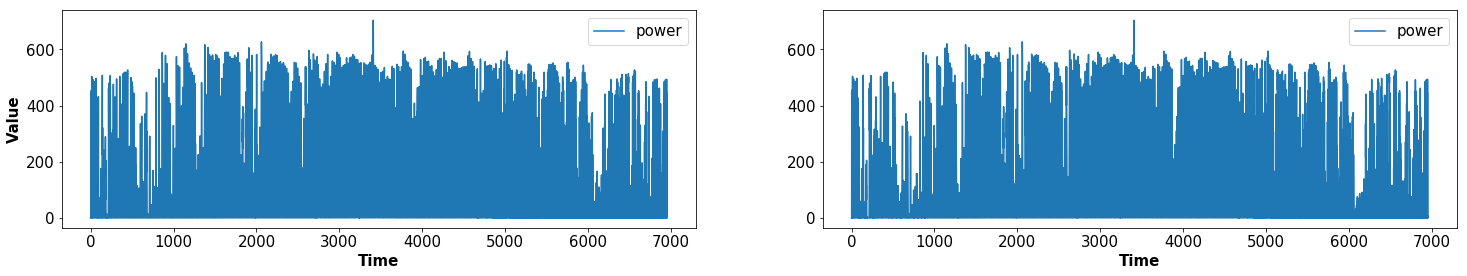

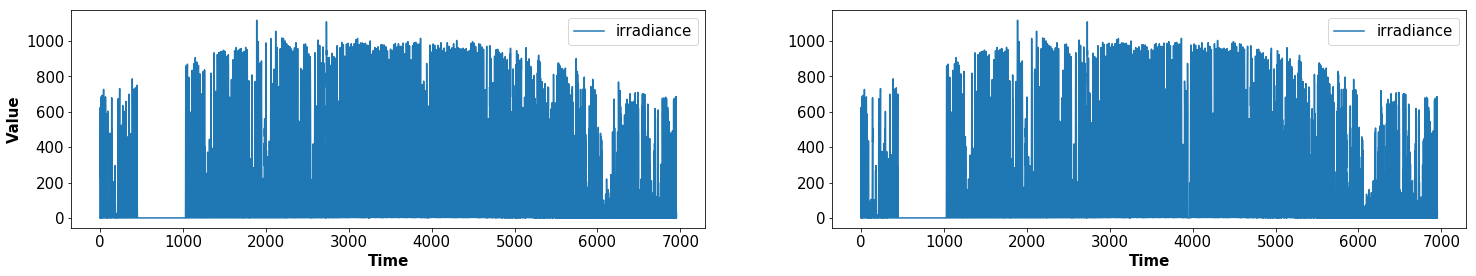

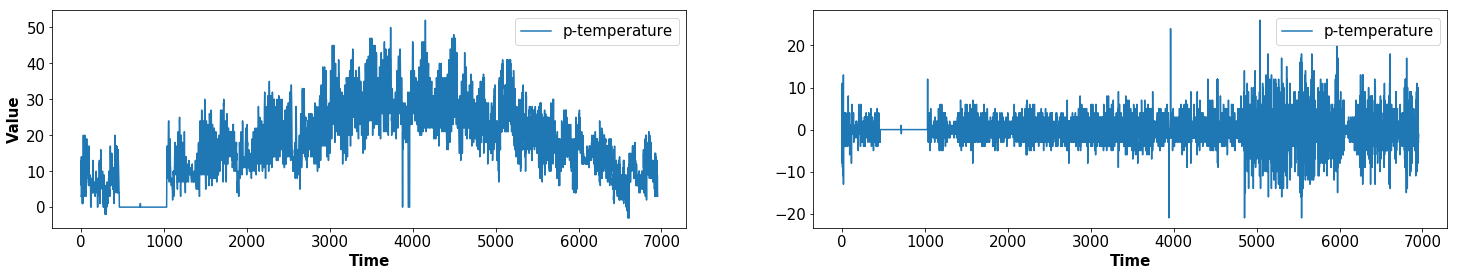

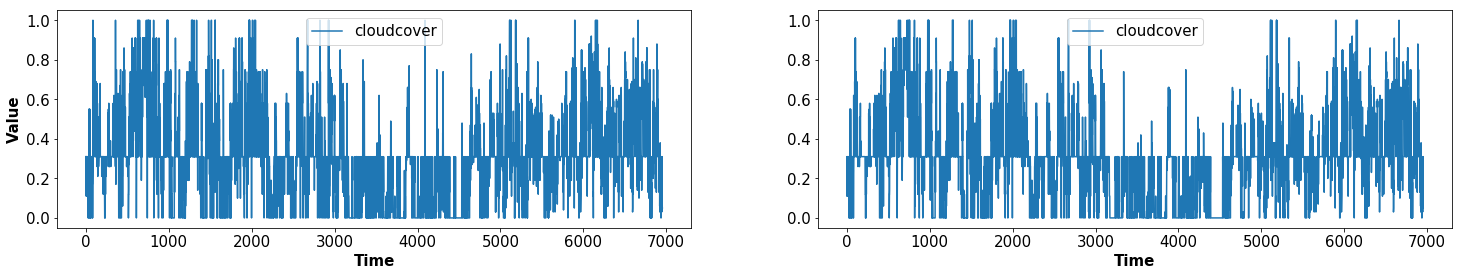

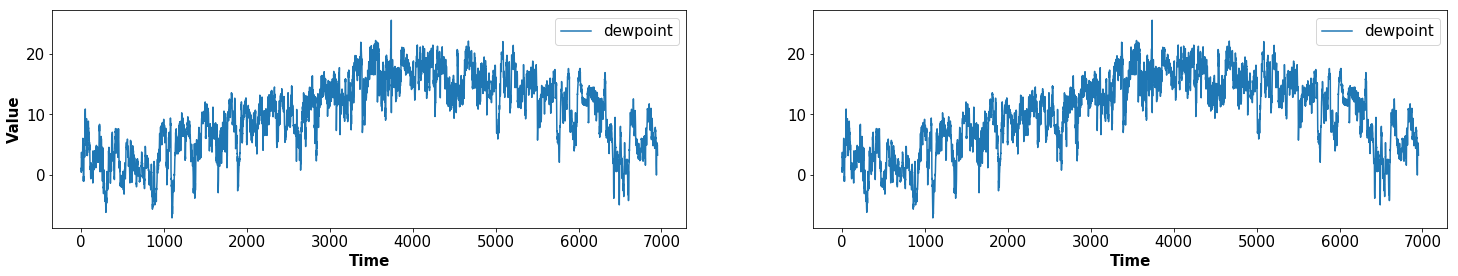

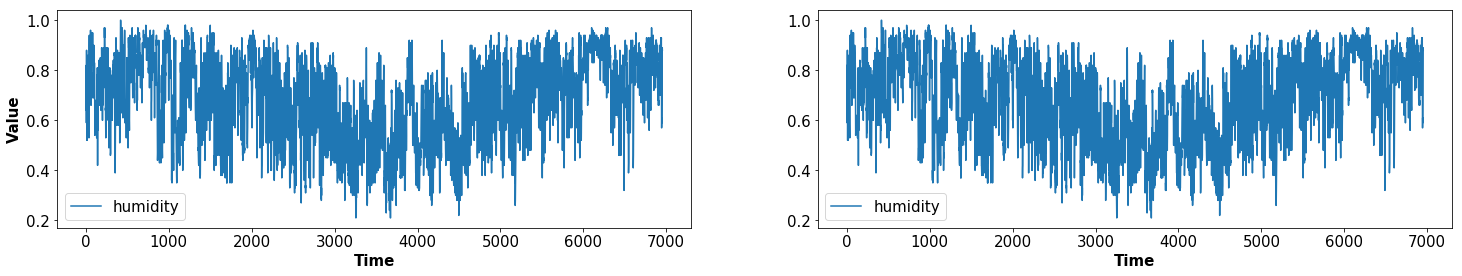

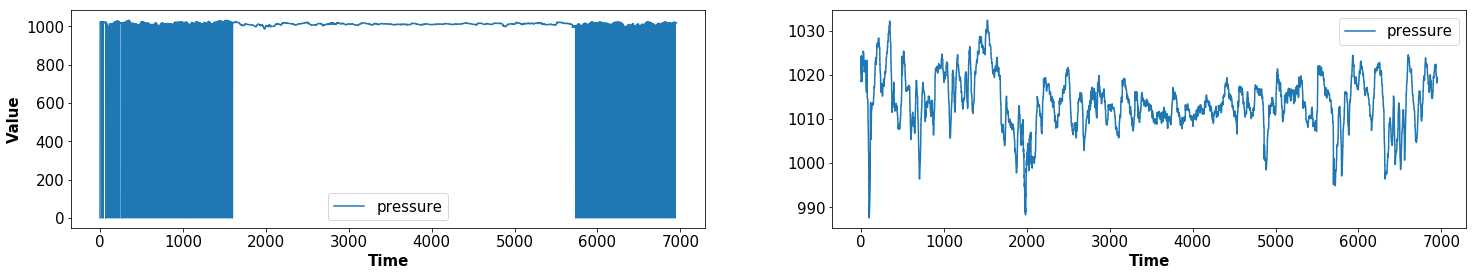

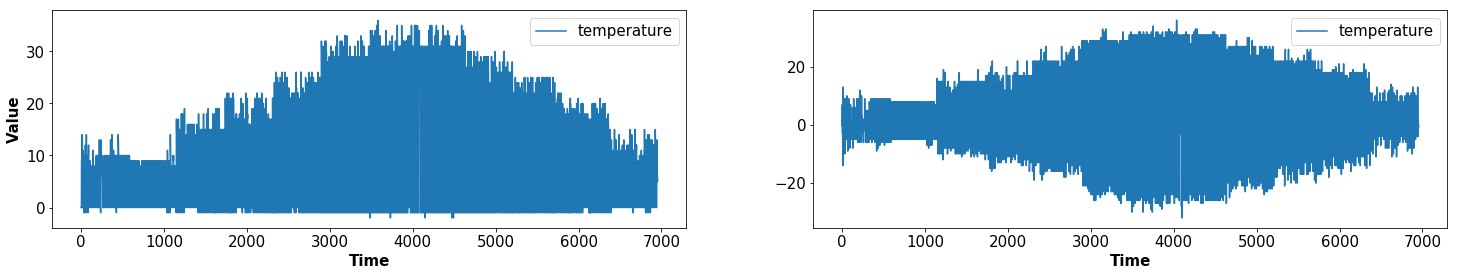

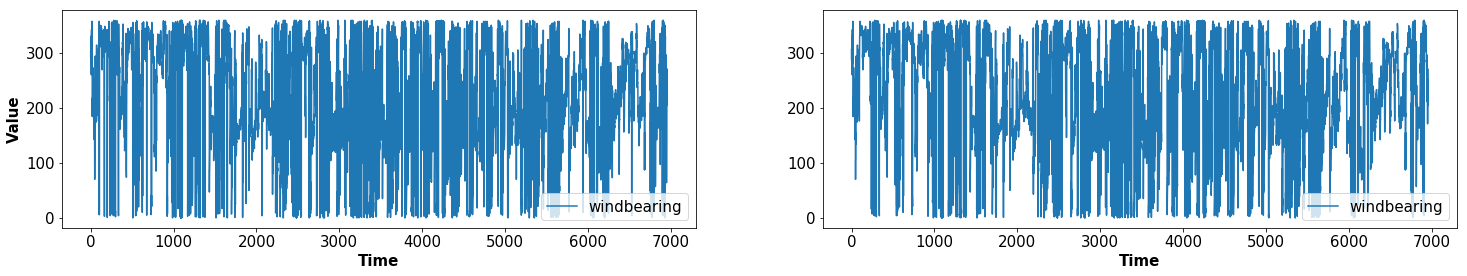

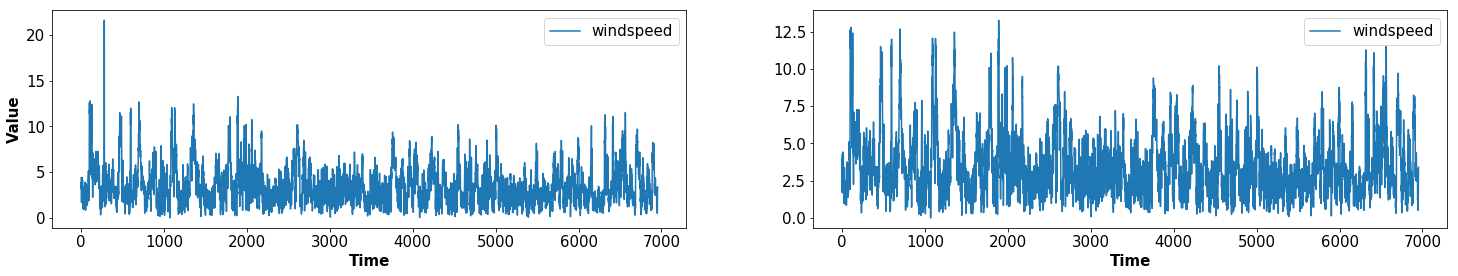

In [5]:
# ---- DATA power plant ----

para_win_size = 20

file_name = ['plant-irradiance.csv', 'plant-temperature.csv', 'weather-cloudcover.csv', \
             'weather-dewpoint.csv', 'weather-humidity.csv', 'weather-pressure.csv', \
             'weather-temperature.csv', 'weather-windbearing.csv', 'weather-windspeed.csv']

# load training data
addr = "../../dataset/ts/power_plant/training/"

idx = range(19)
cols = ['id', 'day'] + idx

#  target file
file_path = addr + 'plant-power.csv'
dta_df = pd.read_csv( file_path, sep =',', names = cols, header = 0 )

tmp = np.asarray( dta_df[ dta_df['id'] == 1 ].drop(['id', 'day'], axis = 1) )
stack_ts = np.expand_dims( tmp.flatten(), -1 )

print "number of y values:", np.shape(stack_ts)

#  exogenous files
for i in file_name:
    
    file_path = addr + i
    dta_df = pd.read_csv( file_path ,sep = ',', names = cols, header = 0 )
    
    tmp_ts = np.asarray( dta_df[ dta_df['id'] == 1 ].drop(['id', 'day'], axis = 1) )
    var_ts = np.expand_dims( tmp_ts.flatten(), -1 )
    
    stack_ts = np.concatenate( (stack_ts, var_ts), axis = 1 )

vari_name = ['power', 'irradiance', 'p-temperature', 'cloudcover', 'dewpoint', 'humidity', 'pressure', \
             'temperature', 'windbearing', 'windspeed']

dta_df = pd.DataFrame( stack_ts, columns = vari_name )

print dta_df.shape
print dta_df.columns

# smooth, outlier
smooth_df = multivariate_ts_smooth(dta_df, 10)
    
# stationarize
smooth_stat_df = multivariate_ts_stationarize(smooth_df)

print smooth_stat_df.columns, smooth_stat_df.shape


# --- visualization

multivariate_ts_plot_pair(dta_df,
                          smooth_stat_df,
                          'data')

corr = smooth_stat_df.corr()
corr.style.background_gradient()

[['irradiance', 0.9726899234168263], ['humidity', -0.5316071601740285], ['temperature', 0.37421807392969014], ['p-temperature', 0.3450615493226121], ['windbearing', -0.18947028461248103], ['windspeed', 0.1648183201219368], ['cloudcover', -0.09984865086745986], ['pressure', 0.09011098042441086], ['dewpoint', 0.018167353392060097]]


(-1, 12)

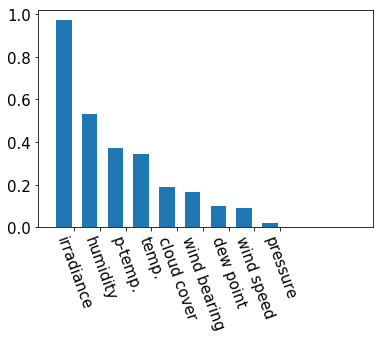

In [13]:
#  ---- data preparation set-up

split_idx = int(0.8*dta_df.shape[0])
para_train_range = (1000, 5400)
para_test_range  = (5400, 6954)

target_col = 'power'
feature_cols = ['irradiance', 'p-temperature', 'cloudcover', 'dewpoint', 'humidity', 'pressure',\
                'temperature', 'windbearing', 'windspeed']

# -- variable ranking 

feature_cols_full = ['irradiance','windspeed', 'humidity','pressure', 'cloudcover']

feature_cols_tensor = ['pressure', 'windbearing','windspeed', 'dewpoint', 'cloudcover']


# -- cross-correlation between the target and exogenous variables 

corre_list = []
corre_df = smooth_stat_df.iloc[1000: 5400]

for i in corre_df.columns:
    
    if i != target_col:
        
        tmpcorre = np.corrcoef(list(corre_df[target_col]), list(corre_df[i]))[0,1]
        corre_list.append([i, tmpcorre])
        
sort_list = sorted(corre_list, key =  lambda x:abs(x[1]), reverse = True)
print sort_list 

xlabel = [i[0] for i in sort_list]
x = range(len(sort_list))
y = [abs(i[1]) for i in sort_list]

fig, ax = plt.subplots( )
ax.bar(x, y, width = 0.6);

xlabel = ['irradiance','humidity','p-temp.','temp.','cloud cover',\
          'wind bearing','dew point','wind speed','pressure']
# ax.set_xticklabels( xlabel )

plt.xticks([i + 0.4 for i in x], xlabel, rotation = -70);
ax.set_xlim(-1, 12)

Before filtering: shape of training and testing dataset:  (4380, 20, 6) (4380,) (1533, 20, 6) (1533,)
After filtering: shape of training and testing dataset:  (2951, 20, 6) (2951,) (718, 20, 6) (718,)
MV
((2951, 20, 6), (2951,), (718, 20, 6), (718,))


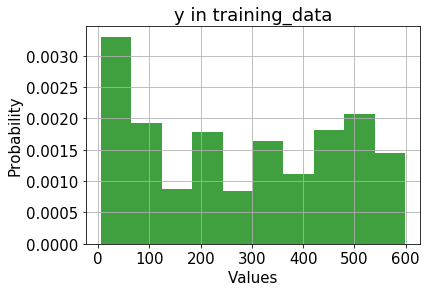

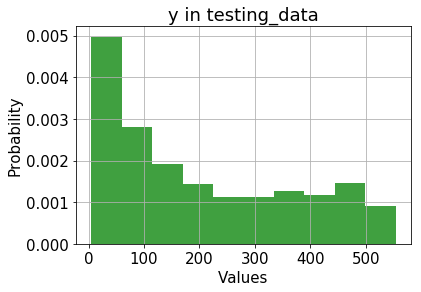

In [14]:
# --- Training and Testing data


feature_cols = feature_cols_tensor

x_train, x_test, y_train, y_test = build_training_testing_data_4learning(smooth_stat_df, 
                                                                         target_col, 
                                                                         feature_cols,\
                                                                         para_uni_variate, 
                                                                         para_train_test_split, 
                                                                         para_win_size, 
                                                                         para_train_range, 
                                                                         para_test_range, 
                                                                         para_is_stateful)

print 'Before filtering: shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
np.shape(x_test), np.shape(y_test)

# filtering on y-value
idx_set = []
for i in range(len(y_train)):
    if y_train[i]>=5 and y_train[i]<=600 :
        idx_set.append(i)
        
x_train = x_train[idx_set]
y_train = y_train[idx_set]

idx_set = []
for i in range(len(y_test)):
    if y_test[i]>=5 and y_test[i]<=600 :
        idx_set.append(i)
x_test = x_test[idx_set]
y_test = y_test[idx_set]
    
print 'After filtering: shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)

# --- Visualization

y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )

# data for different models

x_train.dump("../../dataset/dataset_ts/plant_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/plant_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/plant_xtest.dat")
y_test.dump("../../dataset/dataset_ts/plant_ytest.dat")

files = ["../../dataset/dataset_ts/plant_xtrain.dat", "../../dataset/dataset_ts/plant_xtest.dat",
         "../../dataset/dataset_ts/plant_ytrain.dat",  "../../dataset/dataset_ts/plant_ytest.dat"]

print 'MV'
prepare_train_test_RETAIN(files, 
                          "../../dataset/dataset_ts/", 
                          "plant_tensor", 
                          "mv")


# print 'RETAIN'
# prepare_train_test_RETAIN(files, 
#                           "../../dataset/dataset_ts/data_to_share/", 
#                           "plant", 
#                           "nips")

# print 'DUAL'

# prepare_train_test_DualRNN(x_train, y_train, x_test, y_test, \
#                            "../../dataset/dataset_ts/data_to_share/", 
#                            "plant", \
#                            para_win_size, 
#                            para_is_stateful, 
#                            False)

In [12]:
# for statistical models
x_train, x_test = build_training_testing_data_4statistics(dta_df, target_col, feature_cols, \
                                                          para_uni_variate, \
                                                          para_train_range, para_test_range)

print np.shape(x_train), np.shape(x_test)
x_train.dump("../../dataset/dataset_ts/plant_xtrain_statis.dat")
x_test.dump("../../dataset/dataset_ts/plant_xtest_statis.dat")

(4400, 10) (1554, 10)


In [39]:
# ---- DATA SML

import sys
sys.path.insert(0, './data/sml')
from process_data import *

data1 = pd.read_csv('../../dataset/dataset_ts/sml/NEW-DATA-1.T15.txt', sep=" ")
data2 = pd.read_csv('../../dataset/dataset_ts/sml/NEW-DATA-2.T15.txt', sep=" ")
data_df = pd.concat([data1, data2])

cols = ['3:Temperature_Comedor_Sensor',
        '5:Weather_Temperature', 
        '6:CO2_Comedor_Sensor', '7:CO2_Habitacion_Sensor', 
        '8:Humedad_Comedor_Sensor','9:Humedad_Habitacion_Sensor', 
        '10:Lighting_Comedor_Sensor','11:Lighting_Habitacion_Sensor', 
        '13:Meteo_Exterior_Crepusculo',
        '14:Meteo_Exterior_Viento', 
        '15:Meteo_Exterior_Sol_Oest', '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud',
        '18:Meteo_Exterior_Piranometro', 
        '22:Temperature_Exterior_Sensor',
        '23:Humedad_Exterior_Sensor',
        '4:Temperature_Habitacion_Sensor']

eng_cols = ['Temp. dinning',
          'Forecast temp.', 
          'CO2 dinning', 
          'CO2 room', 
          'Humid. dinning', 
          'Humid. room', 
          'Lighting dinning', 
          'Lighting room', 
          'Sun dusk',
          'Wind', 
          'Sunlight in west', 
          'Sunlight in east', 
          'Sunlight in south', 
          'Sun irradiance', 
          'Outdoor temp.',
          'Outdoor humidity',
          'Temp. room']

feature_col = ['Temp. dinning',
          'Forecast temp.', 
          'CO2 dinning', 
          'CO2 room', 
          'Humid. dinning', 
          'Humid. room', 
          'Lighting dinning', 
          'Lighting room', 
          'Sun dusk',
          'Wind', 
          'Sunlight in west', 
          'Sunlight in east', 
          'Sunlight in south', 
          'Sun irradiance', 
          'Outdoor temp.',
          'Outdoor humidity']

# --- 

targe_col = ['Temp. room']

feature_col_full = ['Sunlight in west', 'Sunlight in east', 'Lighting dinning', 
                    'Humid. dinning', 'Temp. dinning', 'Lighting room', 
                    'CO2 room', 'Humid. room' ]

feature_col_tensor = ['Humid. room', 'Sunlight in west', 'Outdoor temp.', 
                      'CO2 dinning', 'Forecast temp.', 'Humid. dinning', 
                      'Lighting dinning', 'Sun irradiance']


# speicify feature column
feature_col = feature_col_full

# load specific data.
train_df = pd.DataFrame( load_specific_data(data_df, 0, 3200) )
val_df = pd.DataFrame( load_specific_data(data_df, 3200, 3200 + 400) )
test_df = pd.DataFrame( load_specific_data(data_df, 3200 + 400, 3200 + 400 + 537) )

train_df.rename(columns = dict(zip(list(train_df.columns), eng_cols)), inplace=True)
val_df.rename(columns = dict(zip(list(val_df.columns), eng_cols)), inplace=True)
test_df.rename(columns = dict(zip(list(test_df.columns), eng_cols)), inplace=True)

train_df = train_df[ feature_col + targe_col ]
test_df = test_df[ feature_col + targe_col ]

print train_df.columns
print test_df.columns

# --- MV 

# preprocess data.
train, stat = preprocess_data(train_df)
test, _ = preprocess_data(test_df, stat)

# process data.
xtrain, ytrain = process_data_plain(np.asarray(train), window_size=10 + 1)
xtest, ytest = process_data_plain(np.asarray(test), window_size=10 + 1)

print '--  Shape: ', np.shape(xtrain), np.shape(ytrain), np.shape(xtest), np.shape(ytest)

dump_path = "../../dataset/dataset_ts/"
dump_prefix = "sml_full"
dump_postfix = "mv"

xtrain.dump(dump_path + dump_prefix + "_xtrain_" + dump_postfix + ".dat")
xtest.dump(dump_path + dump_prefix + "_xtest_" + dump_postfix + ".dat")
    
ytrain.dump(dump_path + dump_prefix + "_ytrain_" + dump_postfix + ".dat")
ytest.dump(dump_path + dump_prefix + "_ytest_" + dump_postfix + ".dat")
    

Index([u'Sunlight in west', u'Sunlight in east', u'Lighting dinning',
       u'Humid. dinning', u'Temp. dinning', u'Lighting room', u'CO2 room',
       u'Humid. room', u'Temp. room'],
      dtype='object')
Index([u'Sunlight in west', u'Sunlight in east', u'Lighting dinning',
       u'Humid. dinning', u'Temp. dinning', u'Lighting room', u'CO2 room',
       u'Humid. room', u'Temp. room'],
      dtype='object')
--  Shape:  (3190, 10, 9) (3190,) (527, 10, 9) (527,)


In [30]:
tmparr = [[u'ADSK', 0.00023858716], [u'PAYX', 0.00023869322], [u'AAL', 0.00023993119], [u'MYL', 0.00024015515], [u'CA', 0.00024144033], [u'FOX', 0.00024341498], [u'EA', 0.00024963205], [u'BIDU', 0.00025009923], [u'MCHP', 0.00025015706], [u'QVCA', 0.00025018162], [u'NVDA', 0.00025088928], [u'WBA', 0.00025147066], [u'LRCX', 0.00025165512], [u'TSCO', 0.00025247637], [u'CTSH', 0.00025284023], [u'CSX', 0.00025417344], [u'COST', 0.00025498777], [u'BIIB', 0.00025547648], [u'LBTYA', 0.00025680827], [u'SIRI', 0.00025686354], [u'ADBE', 0.00025687047], [u'MDLZ', 0.00025788756], [u'LBTYK', 0.00025885308], [u'INTC', 0.00025894548], [u'TSLA', 0.0002592771], [u'WFM', 0.00025941888], [u'SBUX', 0.00025953245], [u'AVGO', 0.00026012328], [u'CTRP', 0.00026024296], [u'AMZN', 0.00026168497], [u'ALXN', 0.00026173133], [u'AMGN', 0.0002617908], [u'GILD', 0.0002619058], [u'VOD', 0.00026195042], [u'ROST', 0.00026237246], [u'NXPI', 0.0002624988], [u'KHC', 0.0002625609], [u'ADP', 0.0002626155], [u'WDC', 0.00026269013], [u'QCOM', 0.00026288], [u'TMUS', 0.00026333777], [u'AMAT', 0.00026334616], [u'AKAM', 0.00026453246], [u'PCAR', 0.00026510606], [u'CERN', 0.00026535543], [u'VRTX', 0.00026579297], [u'MU', 0.00026719182], [u'MAR', 0.00026789604], [u'TXN', 0.00026821258], [u'GOOGL', 0.0002684545], [u'ESRX', 0.00026995668], [u'ATVI', 0.0002703378], [u'STX', 0.0002708045], [u'FAST', 0.00027182887], [u'EXPE', 0.0002747627], [u'CELG', 0.00027897576], [u'PYPL', 0.00027971127], [u'MXIM', 0.0002802631], [u'NFLX', 0.00028330996], [u'BBBY', 0.00028975168], [u'SYMC', 0.0002932911], [u'CMCSA', 0.00031882498], [u'SWKS', 0.00034903747], [u'DLTR', 0.0004099159], [u'YHOO', 0.0004359138], [u'VIAB', 0.00046212596], [u'Auto-regressive', 0.0004718905], [u'MAT', 0.0008193875], [u'MSFT', 0.002350653], [u'ADI', 0.0035426863], [u'DISH', 0.0056709386], [u'AAPL', 0.007597621], [u'EBAY', 0.008922806], [u'JD', 0.03449823], [u'FB', 0.056254942], [u'XLNX', 0.09711476], [u'CSCO', 0.09782402], [u'DISCA', 0.108503476], [u'NCLH', 0.11029968], [u'TRIP', 0.12302372], [u'FOXA', 0.14510903], [u'NTAP', 0.18010232]]

chosen = [i[0] for i in tmparr][-41:]

print chosen, len(chosen)

[u'AMAT', u'AKAM', u'PCAR', u'CERN', u'VRTX', u'MU', u'MAR', u'TXN', u'GOOGL', u'ESRX', u'ATVI', u'STX', u'FAST', u'EXPE', u'CELG', u'PYPL', u'MXIM', u'NFLX', u'BBBY', u'SYMC', u'CMCSA', u'SWKS', u'DLTR', u'YHOO', u'VIAB', u'Auto-regressive', u'MAT', u'MSFT', u'ADI', u'DISH', u'AAPL', u'EBAY', u'JD', u'FB', u'XLNX', u'CSCO', u'DISCA', u'NCLH', u'TRIP', u'FOXA', u'NTAP'] 41


In [36]:
# ---- DATA NASDAQ

import sys
sys.path.insert(0, './data/nasdaq/')
from process_data import *

data = pd.read_csv('../../dataset/dataset_ts/nasdaq/nasdaq100_padding.csv')
full_cols = data.columns
# [u'AAL', u'AAPL', u'ADBE', u'ADI', u'ADP', u'ADSK', u'AKAM', u'ALXN',
#        u'AMAT', u'AMGN', u'AMZN', u'ATVI', u'AVGO', u'BBBY', u'BIDU', u'BIIB',
#        u'CA', u'CELG', u'CERN', u'CMCSA', u'COST', u'CSCO', u'CSX', u'CTRP',
#        u'CTSH', u'DISCA', u'DISH', u'DLTR', u'EA', u'EBAY', u'ESRX', u'EXPE',
#        u'FAST', u'FB', u'FOX', u'FOXA', u'GILD', u'GOOGL', u'INTC', u'JD',
#        u'KHC', u'LBTYA', u'LBTYK', u'LRCX', u'MAR', u'MAT', u'MCHP', u'MDLZ',
#        u'MSFT', u'MU', u'MXIM', u'MYL', u'NCLH', u'NFLX', u'NTAP', u'NVDA',
#        u'NXPI', u'PAYX', u'PCAR', u'PYPL', u'QCOM', u'QVCA', u'ROST', u'SBUX',
#        u'SIRI', u'STX', u'SWKS', u'SYMC', u'TMUS', u'TRIP', u'TSCO', u'TSLA',
#        u'TXN', u'VIAB', u'VOD', u'VRTX', u'WBA', u'WDC', u'WFM', u'XLNX',
#        u'YHOO', u'Auto-regressive']


# --- feature and target set-up

targe_col = ['NDX']

feature_col_full = [u'AMAT', u'AKAM', u'PCAR', u'CERN', u'VRTX', u'MU', u'MAR', u'TXN', u'GOOGL',
                    u'ESRX', u'ATVI', u'STX', u'FAST', u'EXPE', u'CELG', u'PYPL', u'MXIM', u'NFLX', 
                    u'BBBY', u'SYMC', u'CMCSA', u'SWKS', u'DLTR', u'YHOO', u'VIAB', 
                    u'MAT', u'MSFT', u'ADI', u'DISH', u'AAPL', u'EBAY', u'JD', u'FB', u'XLNX', u'CSCO', 
                    u'DISCA', u'NCLH', 
                    u'TRIP', u'FOXA', u'NTAP']

feature_col_tensor = [u'QCOM', u'PCAR', u'ADI', u'TXN', u'PAYX', u'SYMC', u'TSCO', u'CSCO', u'GOOGL', 
                       u'AMZN', u'STX', u'VRTX', u'MAT', u'AAL', u'YHOO', u'JD', u'XLNX', u'FOXA', u'WBA', 
                       u'WDC', u'ADBE', u'TSLA', u'MCHP', u'AAPL', u'SIRI', u'VOD', u'ADP', 
                       u'AKAM', u'TRIP', u'MAR', u'CSX', u'MU', u'BBBY', u'DISH', u'NXPI', u'PYPL', 
                       u'VIAB', u'LBTYA', u'LRCX', u'NCLH']

# speicify feature column
feature_col = feature_col_full

# --- MV

# load specific data.

train_df = pd.DataFrame(load_specific_data(data, 0, 35100), columns = full_cols)
val_df = pd.DataFrame(load_specific_data(data, 35100, 35100 + 2730), columns = full_cols)
test_df = pd.DataFrame(load_specific_data(data, 35100 + 2730, 35100 + 2730 * 2), columns = full_cols)

train_df = train_df[ feature_col + targe_col ]
test_df = test_df[ feature_col + targe_col ]

print train_df.columns


# # --- MV 

# preprocess data.
train, stat = preprocess_data(train_df)
test, _ = preprocess_data(test_df, stat)

# process data.
xtrain, ytrain = process_data_plain(np.asarray(train), window_size=10 + 1)
xtest, ytest = process_data_plain(np.asarray(test), window_size=10 + 1)

print '--  Shape: ', np.shape(xtrain), np.shape(ytrain), np.shape(xtest), np.shape(ytest)

dump_path = "../../dataset/dataset_ts/"
dump_prefix = "nasdaq_full"
dump_postfix = "mv"

xtrain.dump(dump_path + dump_prefix + "_xtrain_" + dump_postfix + ".dat")
xtest.dump(dump_path + dump_prefix + "_xtest_" + dump_postfix + ".dat")
    
ytrain.dump(dump_path + dump_prefix + "_ytrain_" + dump_postfix + ".dat")
ytest.dump(dump_path + dump_prefix + "_ytest_" + dump_postfix + ".dat")
    

Index([u'AMAT', u'AKAM', u'PCAR', u'CERN', u'VRTX', u'MU', u'MAR', u'TXN',
       u'GOOGL', u'ESRX', u'ATVI', u'STX', u'FAST', u'EXPE', u'CELG', u'PYPL',
       u'MXIM', u'NFLX', u'BBBY', u'SYMC', u'CMCSA', u'SWKS', u'DLTR', u'YHOO',
       u'VIAB', u'MAT', u'MSFT', u'ADI', u'DISH', u'AAPL', u'EBAY', u'JD',
       u'FB', u'XLNX', u'CSCO', u'DISCA', u'NCLH', u'TRIP', u'FOXA', u'NTAP',
       u'NDX'],
      dtype='object')
--  Shape:  (35090, 10, 41) (35090,) (2720, 10, 41) (2720,)


Shape of the dataset:  (43824, 13) Index([u'No', u'year', u'month', u'day', u'hour', u'pm2.5', u'DEWP', u'TEMP',
       u'PRES', u'cbwd', u'Iws', u'Is', u'Ir'],
      dtype='object')
('stationary prepro: ', 0, 0.0, 41757, '\n')
('stationary prepro: ', 0, 2.0022724594183912e-07, 41757, '\n')
('stationary prepro: ', 0, 0.0030480506998084704, 41757, '\n')
('stationary prepro: ', 0, 1.4551594538813573e-11, 41757, '\n')
('stationary prepro: ', 0, 0.0, 41757, '\n')
('stationary prepro: ', 0, 0.0, 41757, '\n')
('stationary prepro: ', 0, 0.0, 41757, '\n')
Index([u'pm2.5', u'DEWP', u'TEMP', u'PRES', u'Iws', u'Is', u'Ir'], dtype='object') (41757, 7)


,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
pm2.5,1,0.175369,-0.0882558,-0.0493145,-0.248504,0.01746,-0.0498324
DEWP,0.175369,1,0.824088,-0.777772,-0.293061,-0.0338231,0.114851
TEMP,-0.0882558,0.824088,1,-0.826936,-0.150194,-0.0916414,0.0434485
PRES,-0.0493145,-0.777772,-0.826936,1,0.179305,0.0677934,-0.0723158
Iws,-0.248504,-0.293061,-0.150194,0.179305,1,0.0235309,-0.00621258
Is,0.01746,-0.0338231,-0.0916414,0.0677934,0.0235309,1,-0.00867408
Ir,-0.0498324,0.114851,0.0434485,-0.0723158,-0.00621258,-0.00867408,1


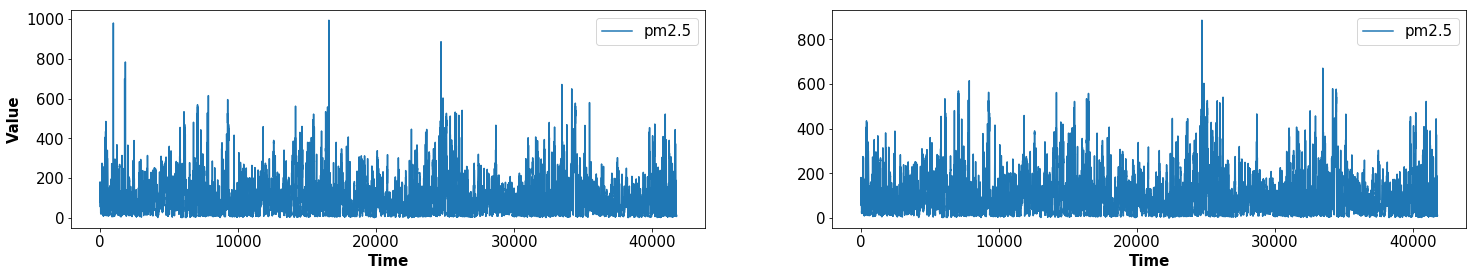

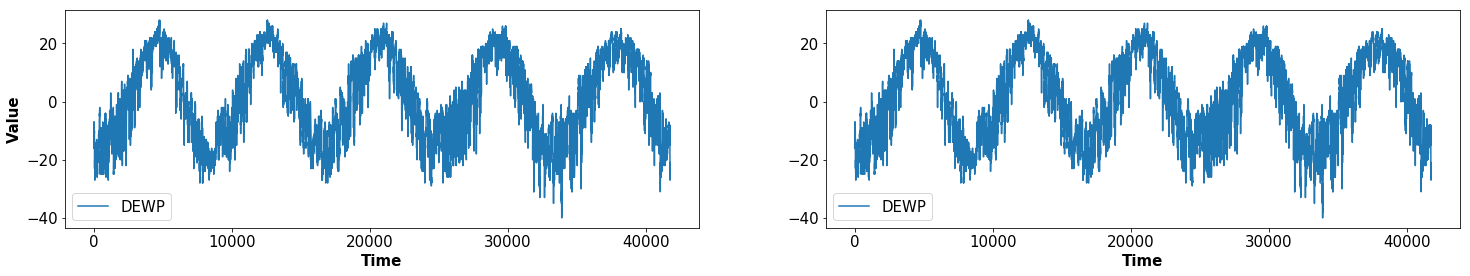

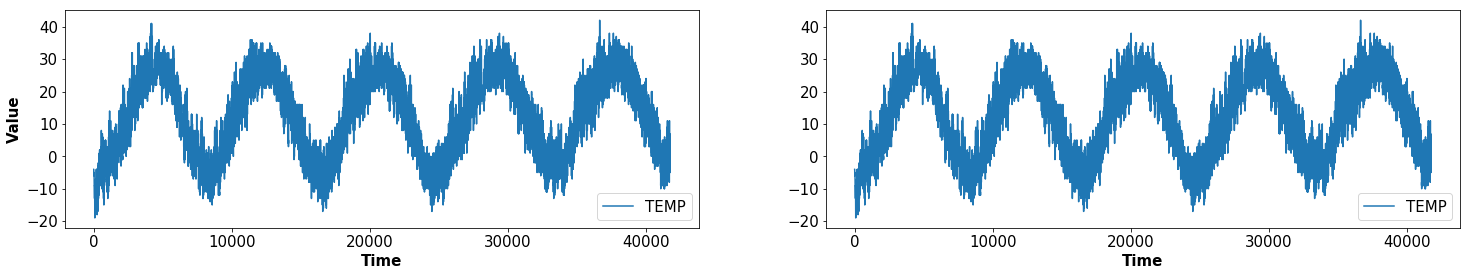

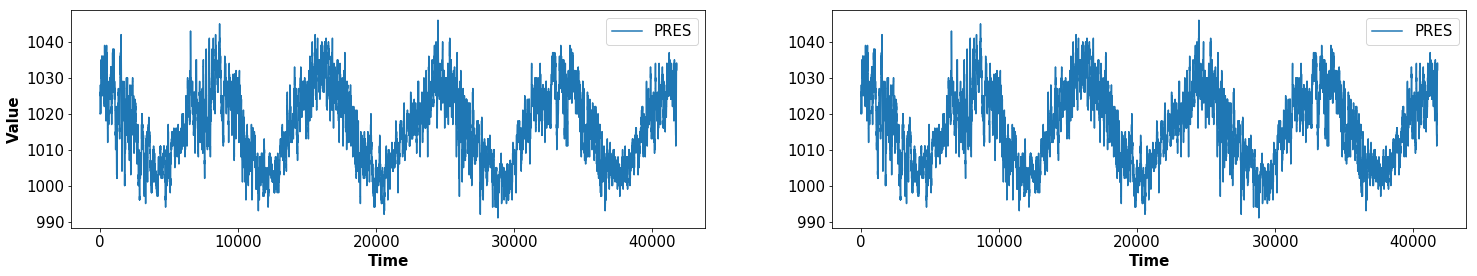

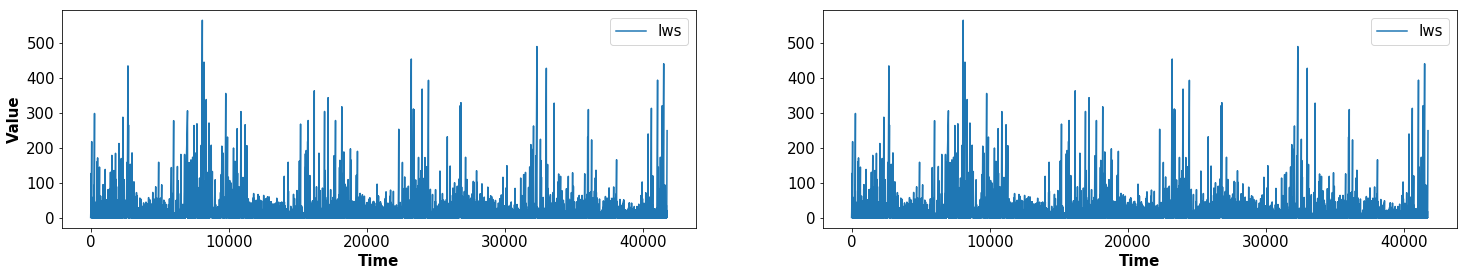

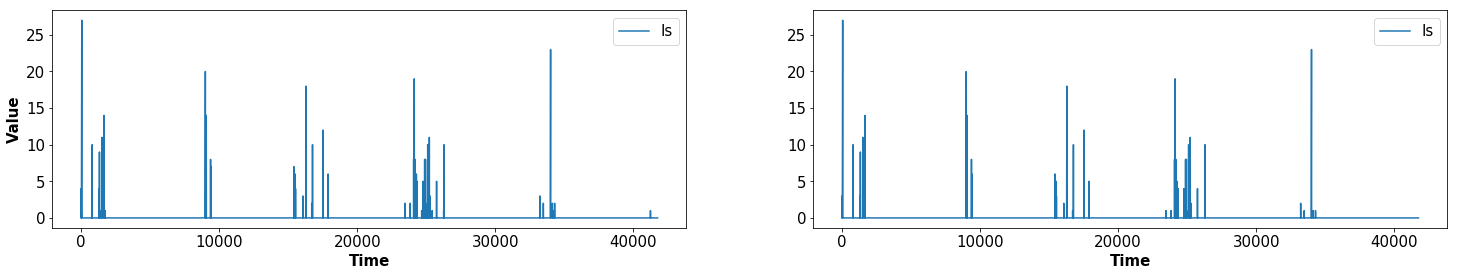

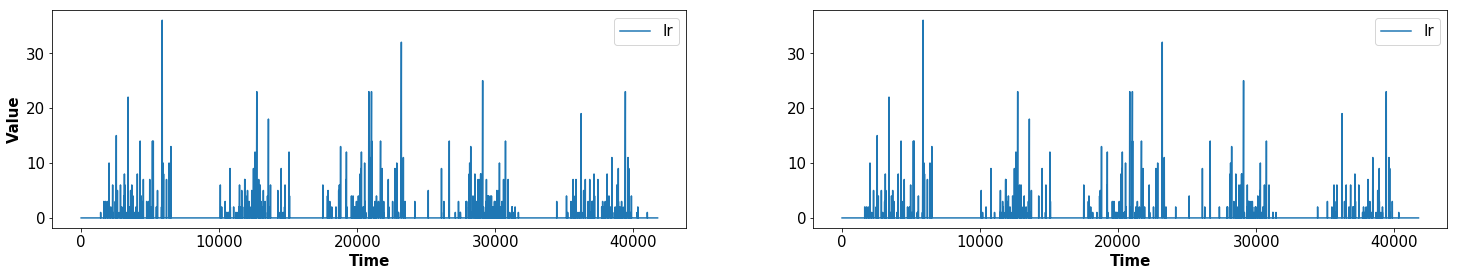

In [137]:
# ---- DATA pm2.5 ----

para_win_size = 20

# load data
addr = "../../dataset/dataset_ts/pm25/pm25_bj.csv"
dta_df = pd.read_csv( addr ,sep=',')
print 'Shape of the dataset: ', dta_df.shape, dta_df.columns

valid_cols = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']


# NULL data
dta_df = dta_df.dropna(axis=0, how='any')

# smooth, outlier
smooth_df = multivariate_ts_smooth(dta_df[valid_cols], 10)
    
# stationarize
smooth_stat_df = multivariate_ts_stationarize(smooth_df)

print smooth_stat_df.columns, smooth_stat_df.shape


# --- visualization

multivariate_ts_plot_pair(dta_df[valid_cols],
                          smooth_stat_df,
                          'data')

corr = smooth_stat_df.corr()
corr.style.background_gradient()
# corr.style.bar()

[['DEWP', 0.28940415258689545], ['Iws', -0.2741298698492076], ['PRES', -0.17316794561102075], ['Ir', -0.04084375336987552], ['TEMP', 0.03390560624661782], ['Is', -0.00904987721456027]]


(-1, 12)

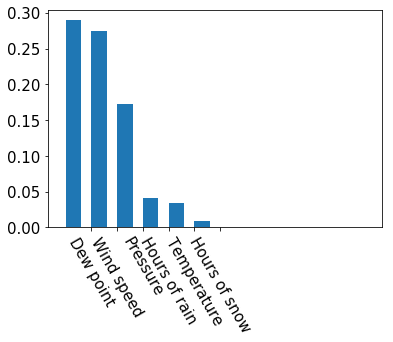

In [153]:
split_idx = int(0.7*dta_df.shape[0])
para_train_range = (0, 20200)
para_test_range  = (20200, 26000)


corre_list = []
target_col = 'pm2.5'

corre_df = smooth_stat_df.iloc[0: 20200]

for i in corre_df.columns:
    
    if i != target_col:
        
        tmpcorre = np.corrcoef(list(corre_df[target_col]), list(corre_df[i]))[0,1]
        corre_list.append([i, tmpcorre])
        
sort_list = sorted(corre_list, key =  lambda x:abs(x[1]), reverse = True)
print sort_list 

xlabel = [i[0] for i in sort_list]
x = range(len(sort_list))
y = [abs(i[1]) for i in sort_list]

fig, ax = plt.subplots( )
ax.bar(x, y, width = 0.6);

xlabel = ['Dew point', 'Wind speed', 'Pressure', 'Hours of rain', 'Temperature', 'Hours of snow']

# ax.set_xticklabels( xlabel )
plt.xticks( [i+0.7 for i in x], xlabel, rotation = -60);
ax.set_xlim(-1, 12)

Before filtering: shape of training and testing dataset:  (20190, 10, 7) (20190,) (5790, 10, 7) (5790,)
After filtering: shape of training and testing dataset:  (12424, 10, 7) (12424,) (3371, 10, 7) (3371,)
MV
((12424, 10, 7), (12424,), (3371, 10, 7), (3371,))
RETAIN
((12424, 10, 7), (12424,), (3371, 10, 7), (3371,))
DUAL
((12424, 10, 6), (12424, 10), (12424,))
((3371, 10, 6), (3371, 10), (3371,))


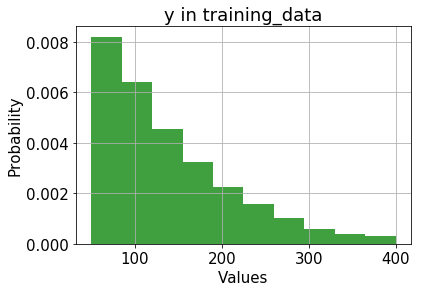

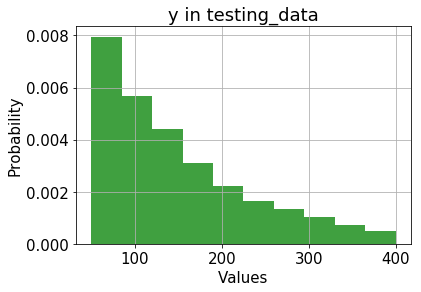

In [22]:
# --- Training and Testing data


target_col = 'pm2.5'
feature_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning(smooth_stat_df, target_col, feature_cols, \
                                      para_uni_variate, para_train_test_split, para_win_size, \
                                      para_train_range, para_test_range, para_is_stateful )

print 'Before filtering: shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)

# filtering on y-value
idx_set = []
for i in range(len(y_train)):
    if y_train[i]>=50 and y_train[i]<=400:
        idx_set.append(i)
        
x_train = x_train[idx_set]
y_train = y_train[idx_set]

idx_set = []
for i in range(len(y_test)):
    if y_test[i]>=50 and y_test[i]<=400:
        idx_set.append(i)
x_test = x_test[idx_set]
y_test = y_test[idx_set]

print 'After filtering: shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)

# visualization
y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )


# data for different models

x_train.dump("../../dataset/dataset_ts/pm25_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/pm25_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/pm25_xtest.dat")
y_test.dump("../../dataset/dataset_ts/pm25_ytest.dat")

files = ["../../dataset/dataset_ts/pm25_xtrain.dat", "../../dataset/dataset_ts/pm25_xtest.dat",
         "../../dataset/dataset_ts/pm25_ytrain.dat",  "../../dataset/dataset_ts/pm25_ytest.dat"]

# normalize features
print 'MV'
prepare_train_test_RETAIN(files, "../../dataset/dataset_ts/", "pm25", "mv")


print 'RETAIN'
prepare_train_test_RETAIN(files, "../../dataset/dataset_ts/data_to_share/", "pm25", "nips")


print 'DUAL'

prepare_train_test_DualRNN(x_train, y_train, x_test, y_test, \
                           "../../dataset/dataset_ts/data_to_share/", "pm25", \
                           para_win_size, para_is_stateful, False)


In [23]:
# for statistical models
x_train, x_test = build_training_testing_data_4statistics( dta_df, target_col, feature_cols, \
                                para_uni_variate, \
                                para_train_range, para_test_range)

print np.shape(x_train), np.shape(x_test)
x_train.dump("../../dataset/dataset_ts/pm25_xtrain_statis.dat")
x_test.dump("../../dataset/dataset_ts/pm25_xtest_statis.dat")


(20200, 7) (5800, 7)


In [187]:
# ---- DATA Nasdaq ----

dta = pd.read_csv('../../dataset/dataset_ts/nasdaq/nasdaq100_padding.csv', sep=",")

print dta.shape, dta.columns

train = load_specific_data(data, 0, 35100)


# load_specific_data(data, _from, _to):
#     data = data[_from: _to]
#     features = np.array(data.iloc[:, : -1].values.tolist())
#     target = np.array(data.iloc[:, -1: ].values.tolist())
#     return np.concatenate([features, target], axis=-1)


# def load_data():
    
#     data = pd.read_csv('../../../../dataset/dataset_ts/nasdaq100_padding.csv')
#     train = load_specific_data(data, 0, 35100)
#     val = load_specific_data(data, 35100, 35100 + 2730)
#     test = load_specific_data(data, 35100 + 2730, 35100 + 2730 * 2)
#     return train, val, test


(40560, 82) Index([u'AAL', u'AAPL', u'ADBE', u'ADI', u'ADP', u'ADSK', u'AKAM', u'ALXN',
       u'AMAT', u'AMGN', u'AMZN', u'ATVI', u'AVGO', u'BBBY', u'BIDU', u'BIIB',
       u'CA', u'CELG', u'CERN', u'CMCSA', u'COST', u'CSCO', u'CSX', u'CTRP',
       u'CTSH', u'DISCA', u'DISH', u'DLTR', u'EA', u'EBAY', u'ESRX', u'EXPE',
       u'FAST', u'FB', u'FOX', u'FOXA', u'GILD', u'GOOGL', u'INTC', u'JD',
       u'KHC', u'LBTYA', u'LBTYK', u'LRCX', u'MAR', u'MAT', u'MCHP', u'MDLZ',
       u'MSFT', u'MU', u'MXIM', u'MYL', u'NCLH', u'NFLX', u'NTAP', u'NVDA',
       u'NXPI', u'PAYX', u'PCAR', u'PYPL', u'QCOM', u'QVCA', u'ROST', u'SBUX',
       u'SIRI', u'STX', u'SWKS', u'SYMC', u'TMUS', u'TRIP', u'TSCO', u'TSLA',
       u'TXN', u'VIAB', u'VOD', u'VRTX', u'WBA', u'WDC', u'WFM', u'XLNX',
       u'YHOO', u'NDX'],
      dtype='object')


Shape of the dataset:  (19735, 29) Index([u'date', u'Appliances', u'lights', u'T1', u'RH_1', u'T2', u'RH_2',
       u'T3', u'RH_3', u'T4', u'RH_4', u'T5', u'RH_5', u'T6', u'RH_6', u'T7',
       u'RH_7', u'T8', u'RH_8', u'T9', u'RH_9', u'T_out', u'Press_mm_hg',
       u'RH_out', u'Windspeed', u'Visibility', u'Tdewpoint', u'rv1', u'rv2'],
      dtype='object')
Before filtering: shape of training and testing dataset:  (10990, 10, 14) (10990,) (2390, 10, 14) (2390,)
After filtering: shape of training and testing dataset:  (8200, 10, 14) (8200,) (2127, 10, 14) (2127,)


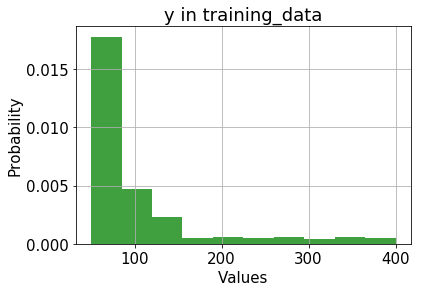

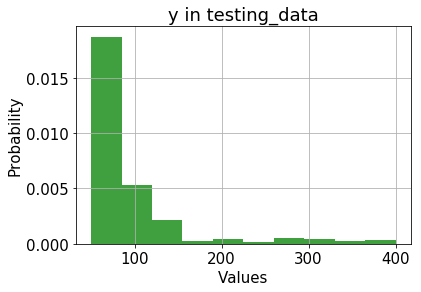

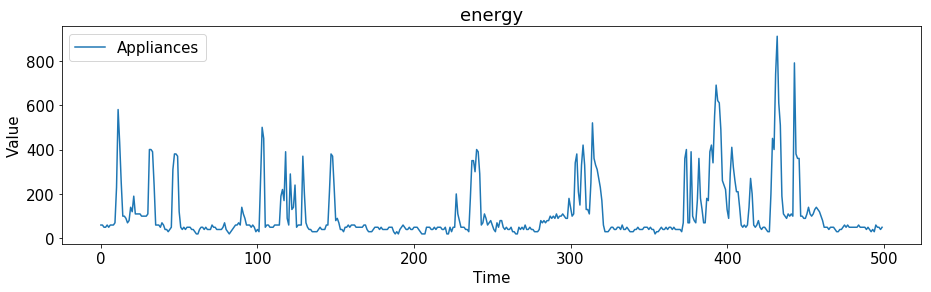

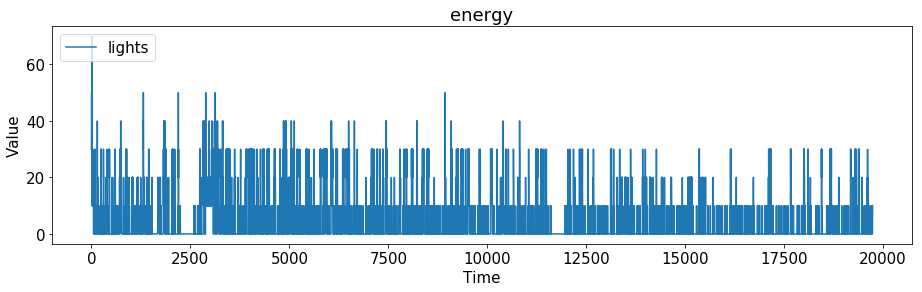

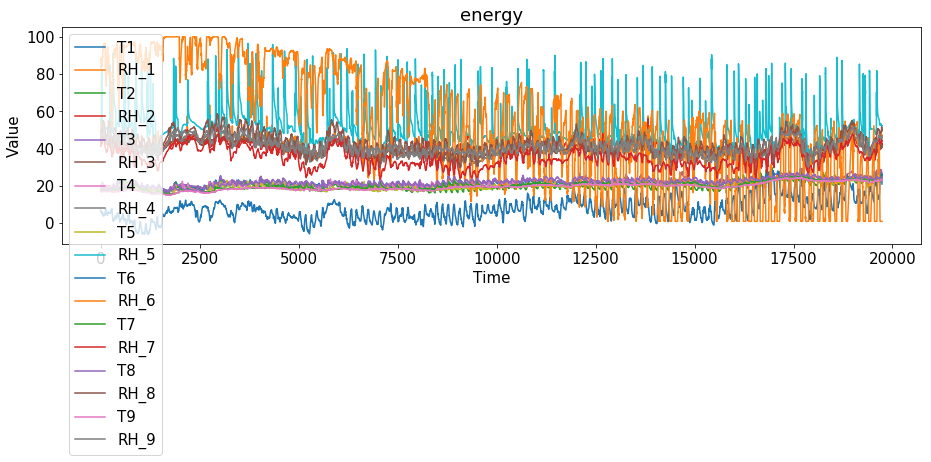

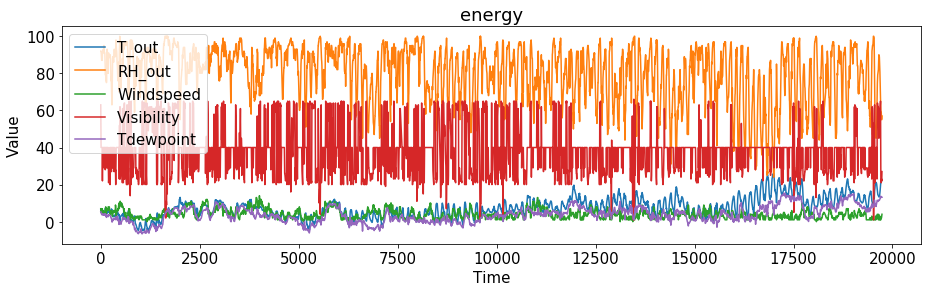

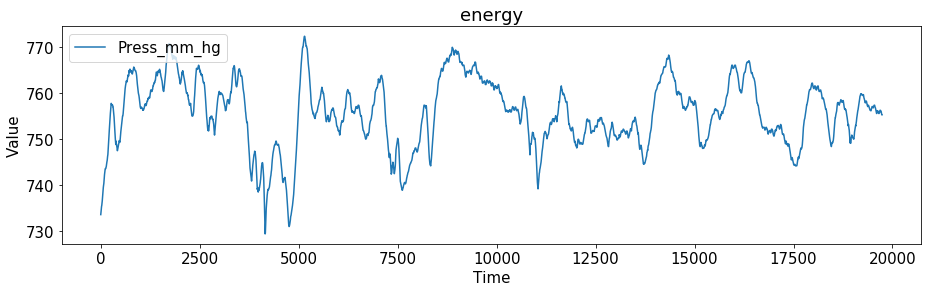

In [22]:
# ---- DATA Energy of applicance consumption ----

para_win_size = 10

# load data
addr = "../../dataset/dataset_ts/app_energy.csv"
dta_df = pd.read_csv( addr ,sep=',')
print 'Shape of the dataset: ', dta_df.shape, dta_df.columns

# prepare training and testing data
split_idx = int(0.7*dta_df.shape[0])
para_train_range = (0, 11000)
para_test_range  = (11000, 13400)


target_col = 'Appliances'
feature_cols = [ 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9' , 'T_out', 'Windspeed', 'RH_out', 'Tdewpoint' 
#                 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',\
#                 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9'
               ]
#'Visibility',  
# 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',  'Tdewpoint',
               
x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning( dta_df, target_col, feature_cols, \
                                      para_uni_variate, para_train_test_split, para_win_size, \
                                      para_train_range, para_test_range, para_is_stateful )

print 'Before filtering: shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)


# y_train = log(y_train+1e-5)
# y_test = log(y_test+1e-5)

# filtering on y-value
idx_set = []
for i in range(len(y_train)):
    if y_train[i]>=50 and y_train[i]<=400:
        idx_set.append(i)
        
x_train = x_train[idx_set]
y_train = y_train[idx_set]

idx_set = []
for i in range(len(y_test)):
    if y_test[i]>=50 and y_test[i]<=400:
        idx_set.append(i)
x_test = x_test[idx_set]
y_test = y_test[idx_set]


print 'After filtering: shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)

    
# visualization
y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )


multivariate_ts_plot( dta_df[['Appliances']].iloc[:500], 'energy')

multivariate_ts_plot( dta_df[['lights']], 'energy')

multivariate_ts_plot( dta_df[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',\
                             'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']], 'energy')

multivariate_ts_plot( dta_df[[ 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']], 'energy')

multivariate_ts_plot( dta_df[['Press_mm_hg']], 'energy')

In [ ]:
# statisical test 
tmpcol = [target_col] + feature_cols 
for i in tmpcol:
    print '--', i, stationary_test( np.asarray(dta_df[i]) )

In [23]:
x_train.dump("../../dataset/dataset_ts/energy_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/energy_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/energy_xtest.dat")
y_test.dump("../../dataset/dataset_ts/energy_ytest.dat")


# prepare data for baselines

files = ["../../dataset/dataset_ts/energy_xtrain.dat", "../../dataset/dataset_ts/energy_xtest.dat",
         "../../dataset/dataset_ts/energy_ytrain.dat", "../../dataset/dataset_ts/energy_ytest.dat"]

print 'RETAIN'
prepare_train_test_RETAIN(files, "../../dataset/dataset_ts/data_to_share/", "energy")


print 'DUAL'

prepare_train_test_DualRNN(x_train, y_train, x_test, y_test, \
                           "../../dataset/dataset_ts/data_to_share/", "energy", \
                           para_win_size, para_is_stateful, False)

RETAIN
(8200, 10, 14) (8200,) (2127, 10, 14) (2127,)
DUAL
(8200, 10, 13) (8200, 10) (8200,)
(2127, 10, 13) (2127, 10) (2127,)


In [29]:
# for statistical models
x_train, x_test = build_training_testing_data_4statistics( dta_df, target_col, feature_cols, \
                                para_uni_variate, \
                                para_train_range, para_test_range)

print np.shape(x_train), np.shape(x_test)
x_train.dump("../../dataset/dataset_ts/energy_xtrain_statis.dat")
x_test.dump("../../dataset/dataset_ts/energy_xtest_statis.dat")


(11000, 14) (2400, 14)


Shape of the dataset:  (4137, 24) Index([u'1:Date', u'2:Time', u'3:Temperature_Comedor_Sensor',
       u'4:Temperature_Habitacion_Sensor', u'5:Weather_Temperature',
       u'6:CO2_Comedor_Sensor', u'7:CO2_Habitacion_Sensor',
       u'8:Humedad_Comedor_Sensor', u'9:Humedad_Habitacion_Sensor',
       u'10:Lighting_Comedor_Sensor', u'11:Lighting_Habitacion_Sensor',
       u'12:Precipitacion', u'13:Meteo_Exterior_Crepusculo',
       u'14:Meteo_Exterior_Viento', u'15:Meteo_Exterior_Sol_Oest',
       u'16:Meteo_Exterior_Sol_Est', u'17:Meteo_Exterior_Sol_Sud',
       u'18:Meteo_Exterior_Piranometro', u'19:Exterior_Entalpic_1',
       u'20:Exterior_Entalpic_2', u'21:Exterior_Entalpic_turbo',
       u'22:Temperature_Exterior_Sensor', u'23:Humedad_Exterior_Sensor',
       u'24:Day_Of_Week'],
      dtype='object')
Shape of training and testing dataset:  (3180, 20, 17) (3180,) (917, 20, 17) (917,)


"\n[u'1:Date', u'2:Time', u'3:Temperature_Comedor_Sensor',\n       u'4:Temperature_Habitacion_Sensor', u'5:Weather_Temperature',\n       u'6:CO2_Comedor_Sensor', u'7:CO2_Habitacion_Sensor',\n       u'8:Humedad_Comedor_Sensor', u'9:Humedad_Habitacion_Sensor',\n       u'10:Lighting_Comedor_Sensor', u'11:Lighting_Habitacion_Sensor',\n       u'12:Precipitacion', u'13:Meteo_Exterior_Crepusculo',\n       u'14:Meteo_Exterior_Viento', u'15:Meteo_Exterior_Sol_Oest',\n       u'16:Meteo_Exterior_Sol_Est', u'17:Meteo_Exterior_Sol_Sud',\n       u'18:Meteo_Exterior_Piranometro', u'19:Exterior_Entalpic_1',\n       u'20:Exterior_Entalpic_2', u'21:Exterior_Entalpic_turbo',\n       u'22:Temperature_Exterior_Sensor', u'23:Humedad_Exterior_Sensor',\n       u'24:Day_Of_Week'],\n"

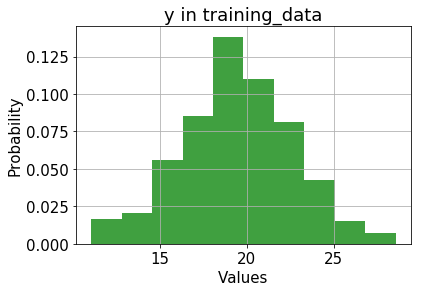

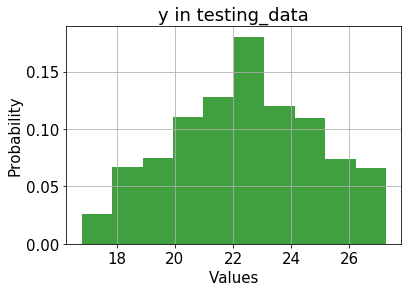

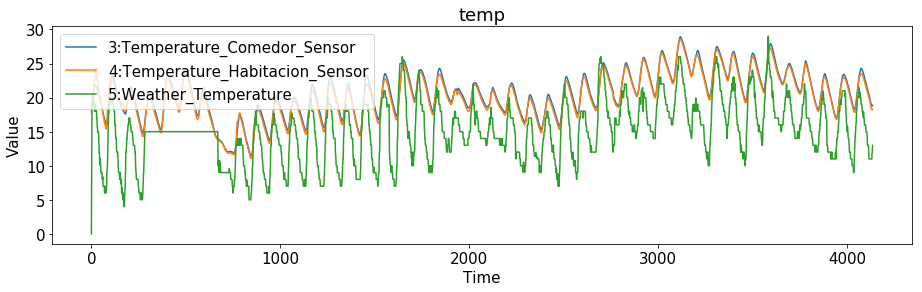

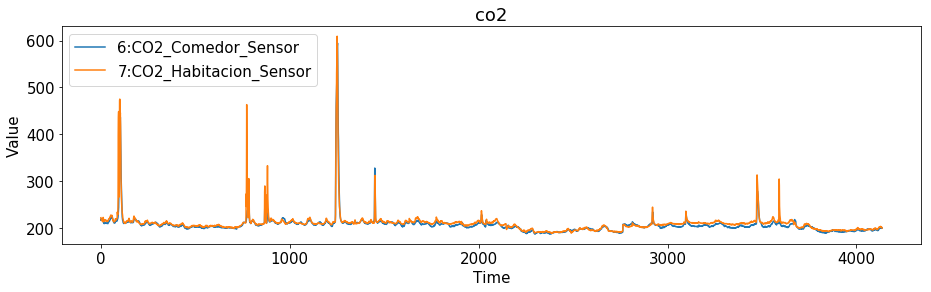

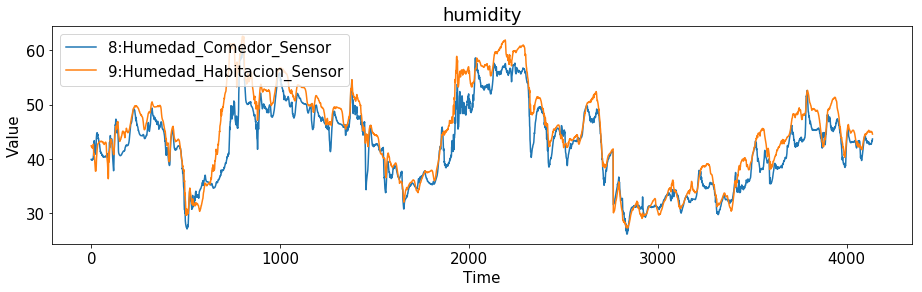

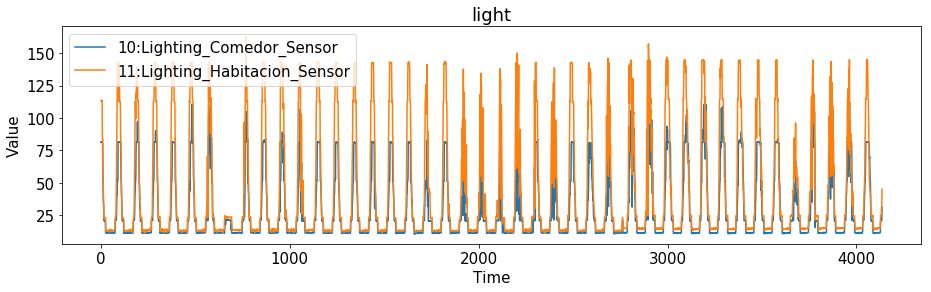

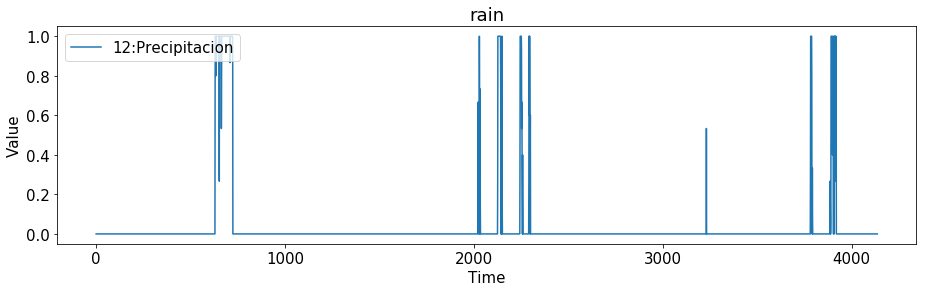

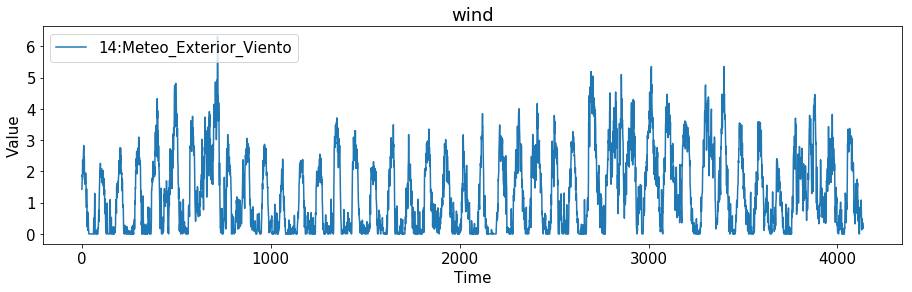

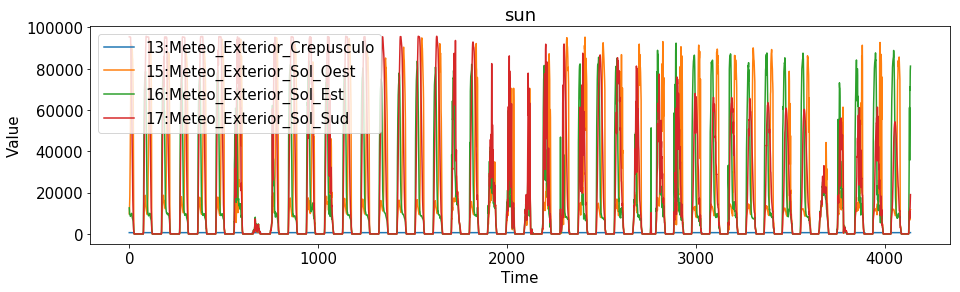

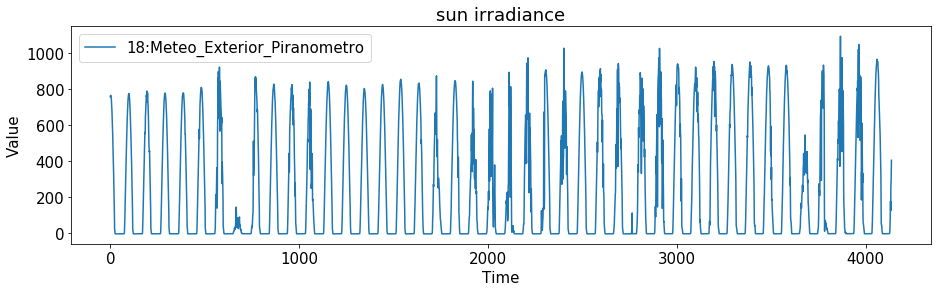

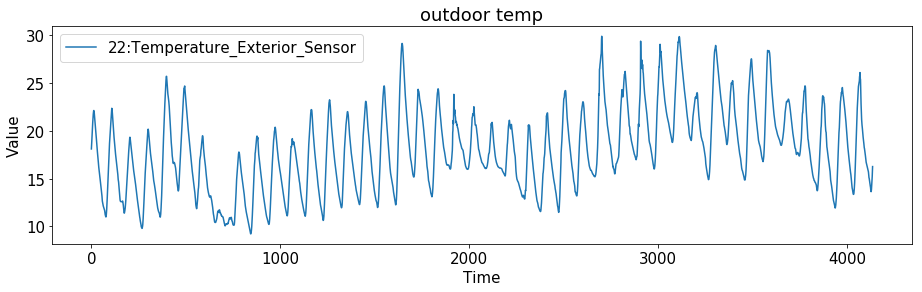

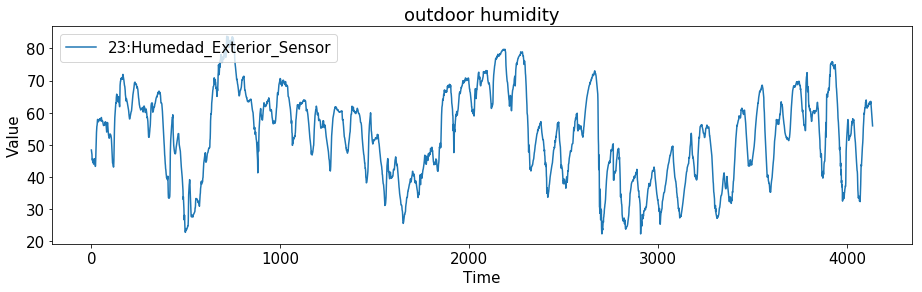

In [343]:
# ---- DATA SML in-house temporature ----

para_win_size = 20

# load data
addr1 = "../../dataset/dataset_ts/sml/NEW-DATA-1.T15.txt"
addr2 = "../../dataset/dataset_ts/sml/NEW-DATA-2.T15.txt"

dta_df1 = pd.read_csv( addr1 ,sep=' ')
dta_df2 = pd.read_csv( addr2 ,sep=' ')
dta_df = dta_df1.append(dta_df2, ignore_index=True)

print 'Shape of the dataset: ', dta_df.shape, dta_df.columns

# prepare training and testing data
split_idx = int(0.7*dta_df.shape[0])
para_train_range = (0, 3200)
para_test_range  = (3200, 4137)


target_col = '4:Temperature_Habitacion_Sensor'
feature_cols = ['5:Weather_Temperature',\
                '6:CO2_Comedor_Sensor', '7:CO2_Habitacion_Sensor', \
                '8:Humedad_Comedor_Sensor', '9:Humedad_Habitacion_Sensor', \
               '10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor',\
               '12:Precipitacion',\
                '13:Meteo_Exterior_Crepusculo','15:Meteo_Exterior_Sol_Oest', \
                '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud', \
               '14:Meteo_Exterior_Viento',\
               '18:Meteo_Exterior_Piranometro',\
               '22:Temperature_Exterior_Sensor', '23:Humedad_Exterior_Sensor']


x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning( dta_df, target_col, feature_cols, \
                                      para_uni_variate, para_train_test_split, para_win_size, \
                                      para_train_range, para_test_range, para_is_stateful )

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)

# # filtering on y-value
# idx_set = []
# for i in range(len(y_train)):
#     if y_train[i]>=50 and y_train[i]<=400:
#         idx_set.append(i)
        
# x_train = x_train[idx_set]
# y_train = y_train[idx_set]

# idx_set = []
# for i in range(len(y_test)):
#     if y_test[i]>=50 and y_test[i]<=400:
#         idx_set.append(i)
# x_test = x_test[idx_set]
# y_test = y_test[idx_set]

    
# # visualization
y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )

multivariate_ts_plot( dta_df[['3:Temperature_Comedor_Sensor', '4:Temperature_Habitacion_Sensor',\
                             '5:Weather_Temperature']], 'temp')

multivariate_ts_plot( dta_df[['6:CO2_Comedor_Sensor','7:CO2_Habitacion_Sensor']], 'co2')

multivariate_ts_plot( dta_df[['8:Humedad_Comedor_Sensor','9:Humedad_Habitacion_Sensor']], 'humidity')

multivariate_ts_plot( dta_df[['10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor']], 'light')

multivariate_ts_plot( dta_df[['12:Precipitacion']], 'rain')

multivariate_ts_plot( dta_df[['14:Meteo_Exterior_Viento']], 'wind')

multivariate_ts_plot( dta_df[['13:Meteo_Exterior_Crepusculo', '15:Meteo_Exterior_Sol_Oest', \
                              '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud']], 'sun')

multivariate_ts_plot( dta_df[['18:Meteo_Exterior_Piranometro']], 'sun irradiance')

multivariate_ts_plot( dta_df[['22:Temperature_Exterior_Sensor']], 'outdoor temp')

multivariate_ts_plot( dta_df[['23:Humedad_Exterior_Sensor']], 'outdoor humidity')

'''
[u'1:Date', u'2:Time', u'3:Temperature_Comedor_Sensor',
       u'4:Temperature_Habitacion_Sensor', u'5:Weather_Temperature',
       u'6:CO2_Comedor_Sensor', u'7:CO2_Habitacion_Sensor',
       u'8:Humedad_Comedor_Sensor', u'9:Humedad_Habitacion_Sensor',
       u'10:Lighting_Comedor_Sensor', u'11:Lighting_Habitacion_Sensor',
       u'12:Precipitacion', u'13:Meteo_Exterior_Crepusculo',
       u'14:Meteo_Exterior_Viento', u'15:Meteo_Exterior_Sol_Oest',
       u'16:Meteo_Exterior_Sol_Est', u'17:Meteo_Exterior_Sol_Sud',
       u'18:Meteo_Exterior_Piranometro', u'19:Exterior_Entalpic_1',
       u'20:Exterior_Entalpic_2', u'21:Exterior_Entalpic_turbo',
       u'22:Temperature_Exterior_Sensor', u'23:Humedad_Exterior_Sensor',
       u'24:Day_Of_Week'],
'''

In [344]:
x_train.dump("../../dataset/dataset_ts/temp_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/temp_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/temp_xtest.dat")
y_test.dump("../../dataset/dataset_ts/temp_ytest.dat")


# prepare data for baselines

files = ["../../dataset/dataset_ts/temp_xtrain.dat", "../../dataset/dataset_ts/temp_xtest.dat",
         "../../dataset/dataset_ts/temp_ytrain.dat", "../../dataset/dataset_ts/temp_ytest.dat"]

print 'RETAIN'
prepare_train_test_RETAIN(files, "../../dataset/dataset_ts/data_to_share/", "temp")


print 'DUAL'

prepare_train_test_DualRNN(x_train, y_train, x_test, y_test, \
                           "../../dataset/dataset_ts/data_to_share/", "temp", \
                           para_win_size, para_is_stateful, False)

RETAIN
(3180, 20, 17) (3180,) (917, 20, 17) (917,)
DUAL
(3180, 20, 16) (3180, 20) (3180,)
(917, 20, 16) (917, 20) (917,)


In [35]:
from collections import OrderedDict

d = {'57481': 50, '57480': 89, '57483': 110, '57482': 18, '57485': 82, '57484': 40}
OrderedDict(sorted(d.items(), key=lambda t: t[0]))

OrderedDict([('57480', 89),
             ('57481', 50),
             ('57482', 18),
             ('57483', 110),
             ('57484', 40),
             ('57485', 82)])

temporal order:  OrderedDict([(2, 4), (3, 14), (4, 21), (5, 15), (8, 3)]) 6
(10000, 11) 
Index([u'y', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9'], dtype='object')
Shape of the dataset:  (10000, 11)


,y,0,1,2,3,4,5,6,7,8,9
y,1,0.0264101,0.0334963,0.0291005,0.0364378,0.0298375,0.0369065,0.0217484,0.0367703,0.0265642,0.0323189
0,0.0264101,1,-0.125981,-0.0537918,-0.0108438,0.0434182,-0.0164234,0.188171,-0.0393634,0.254844,-0.0912496
1,0.0334963,-0.125981,1,-0.0165831,0.143415,0.0548708,-0.0535234,0.0228537,0.00982146,-0.0334752,0.0504928
2,0.0291005,-0.0537918,-0.0165831,1,0.0270785,-0.0630122,-0.0802048,-0.0604676,-0.0430075,0.087587,0.0802477
3,0.0364378,-0.0108438,0.143415,0.0270785,1,-0.0111858,-0.0574847,-0.0257543,0.242483,-0.067438,-0.000695888
4,0.0298375,0.0434182,0.0548708,-0.0630122,-0.0111858,1,-0.0171957,0.0765618,-0.0155654,0.0790247,-0.0817042
5,0.0369065,-0.0164234,-0.0535234,-0.0802048,-0.0574847,-0.0171957,1,0.0370079,0.149246,0.0518867,-0.14893
6,0.0217484,0.188171,0.0228537,-0.0604676,-0.0257543,0.0765618,0.0370079,1,-0.0488125,-0.0346698,-0.0402801
7,0.0367703,-0.0393634,0.00982146,-0.0430075,0.242483,-0.0155654,0.149246,-0.0488125,1,-0.0728396,-0.0570744
8,0.0265642,0.254844,-0.0334752,0.087587,-0.067438,0.0790247,0.0518867,-0.0346698,-0.0728396,1,-0.0812479


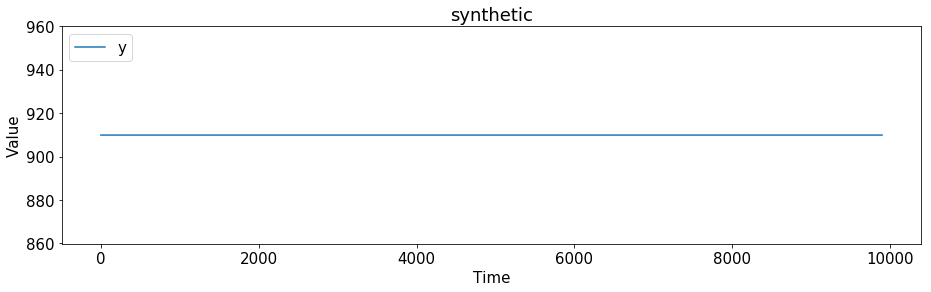

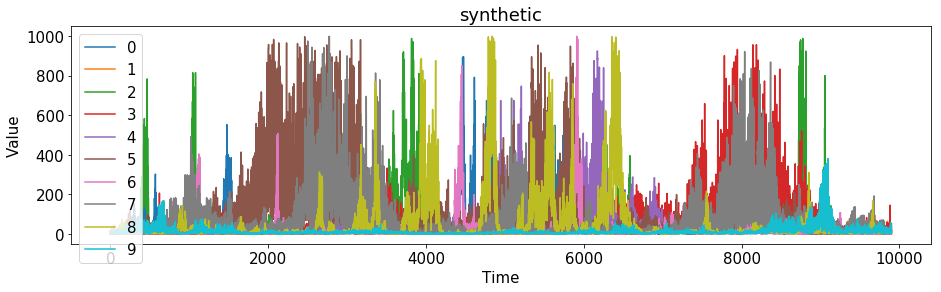

In [68]:
# ---- DATA synthetic data for machine learning ----

#  initilization
N = 10000
V = 10
pre = 30
SV = 5 

y = []
x = [ [] for _ in range(V) ]
C = []
lag = []

for i in range(V):
    
    x[i].append( rand()*rand()*10 )
    for k in range(pre-1):
        x[i].append( 0.1*x[i][0] + rand() )
    
    C.append( [rand()*0.5, rand()*0.5, rand()] )
    
for k in range(pre):
    y.append(rand())
    
for i in range(V):
    lag.append( max(int(rand()*pre), 1 ) )
    

# --- correlated external variables ---
vari = range(V)
random.shuffle(vari)
selected_vari = vari[:SV]
selected_vari_temp = {}

for j in selected_vari:
    selected_vari_temp.update( {j: int(rand()*pre)} )

y_temp = int(rand()*pre/2)

print 'temporal order: ', OrderedDict(sorted(selected_vari_temp.items(), key=lambda t: t[0])), y_temp


# --- generate data    
for t in range(pre, N):
    
    # generate exogenous
    for i in range(V):
        
        tmpx = rand()*x[i][t-1] + rand()*x[i][t - lag[i] -1 ] + C[i][0]
        
        if tmpx>1000:
            x[i].append(x[i][-1])
        else:
            x[i].append( tmpx  )
    
    tmpy = 0.0
    for k in selected_vari:
        for j in range(selected_vari_temp[k]):
            tmpy += rand()*x[k][t-j-1]
    
    # generate the target
    for k in range(y_temp):
        tmpy += rand()*y[t-1-k]
    
    if tmpy > 1000:
        y.append(y[-1])
    else:
        y.append(tmpy)
    
#     y.append( rand() + (0.3*y[t-1] + 0.01*(0.1*x[2][t-1] - 0.1*x[3][t-2])*x[3][t-2])*t*0.0001 )

# format into dataframe
df = pd.DataFrame()
df['y'] = y
# df['y'] = df['y'] * (rand()*40)

x_columns = []
for i in range(V):
    df[str(i)] = x[i]
    x_columns.append(str(i))
#     df[str(i)] = df[str(i)] * (rand()*100)
    
print np.shape(df), '\n', df.columns

# load data
dta_df = df
print 'Shape of the dataset: ', dta_df.shape

multivariate_ts_plot( dta_df[['y']].iloc[100:], 'synthetic')
multivariate_ts_plot( dta_df[x_columns].iloc[100:], 'synthetic')

corr = dta_df.corr()
corr.style.background_gradient()

Shape of training and testing dataset:  (7970, 30, 21) (7970,) (1970, 30, 21) (1970,)
MV
((7970, 30, 21), (7970,), (1970, 30, 21), (1970,))
RETAIN
((7970, 30, 21), (7970,), (1970, 30, 21), (1970,))
DUAL
((7970, 30, 20), (7970, 30), (7970,))
((1970, 30, 20), (1970, 30), (1970,))


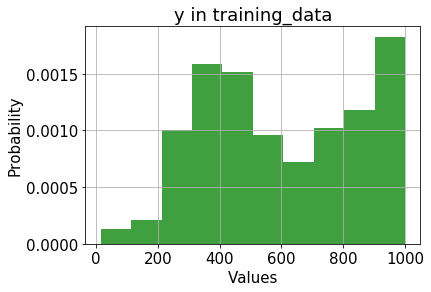

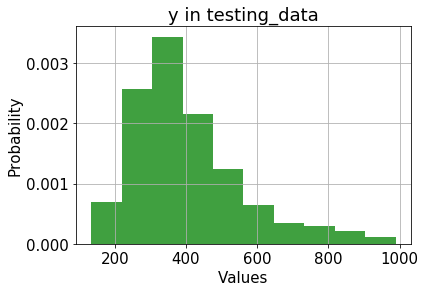

In [202]:
# --- Training and testing data

para_win_size = pre

split_idx = int(0.7*dta_df.shape[0])
para_train_range = (0, 8000)
para_test_range  = (8000, 10000)

target_col = 'y'
feature_cols = [ str(i) for i in range(V) ]

x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning(dta_df, target_col, feature_cols, \
                                      para_uni_variate, para_train_test_split, para_win_size, \
                                      para_train_range, para_test_range, para_is_stateful )

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)

# # filtering on y-value
# idx_set = []
# for i in range(len(y_train)):
#     if y_train[i]>=50 and y_train[i]<=400:
#         idx_set.append(i)
        
# x_train = x_train[idx_set]
# y_train = y_train[idx_set]

# idx_set = []
# for i in range(len(y_test)):
#     if y_test[i]>=50 and y_test[i]<=400:
#         idx_set.append(i)
# x_test = x_test[idx_set]
# y_test = y_test[idx_set]


# visualization
y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )

# --- data for different models

x_train.dump("../../dataset/dataset_ts/syn_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/syn_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/syn_xtest.dat")
y_test.dump("../../dataset/dataset_ts/syn_ytest.dat")

files = ["../../dataset/dataset_ts/syn_xtrain.dat", "../../dataset/dataset_ts/syn_xtest.dat",
         "../../dataset/dataset_ts/syn_ytrain.dat", "../../dataset/dataset_ts/syn_ytest.dat"]

# normalize features
print 'MV'
prepare_train_test_RETAIN(files, "../../dataset/dataset_ts/", "syn5", "mv")

print 'RETAIN'
prepare_train_test_RETAIN(files, "../../dataset/dataset_ts/data_to_share/", "syn5", "nips")


print 'DUAL'
prepare_train_test_DualRNN(x_train, y_train, x_test, y_test, \
                           "../../dataset/dataset_ts/data_to_share/", "syn5", \
                           para_win_size, para_is_stateful, False)

In [ ]:
# ---- DATA house-power for machine learning ----

# Date;Time;Global_active_power;Global_reactive_power;
# Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3


dta_df = pd.read_csv( addr ,sep=';')
print 'Shape of the dataset: ', dta_df.shape, dta_df.columns

split_idx = int(0.8*dta_df.shape[0])
para_train_range = (0, split_idx)
para_test_range  = (split_idx, dta_df.shape[0])

# clean 
dta_df.drop( dta_df[ dta_df['Global_active_power'] == '?' ].index, inplace=True )
dta_df = dta_df.dropna(axis=0)

print dta_df.shape

# type conversion
tmpcol = [ 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',\
          'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' ]

for i in tmpcol:
    dta_df[i] = dta_df[i].astype(float)


x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning( dta_df, 'Voltage', ['Global_active_power','Sub_metering_1'], \
                                para_uni_variate, para_train_test_split, para_win_size, \
                                para_train_range, para_test_range, para_is_stateful )

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train),\
    np.shape(x_test), np.shape(y_test)


# visualization
y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )

# tmpdf = dta_df.drop(['Date', 'Time', 'Voltage'], axis=1)
# multivariate_ts_plot( tmpdf, 'house-power' )

multivariate_ts_plot( dta_df[ ['Global_active_power', 'Global_reactive_power',\
                               'Global_intensity'] ],\
                     'house-power' )

multivariate_ts_plot( dta_df[ ['Voltage'] ], 'house-power' )

multivariate_ts_plot( dta_df[ ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'] ], \
                     'house-power' )

In [ ]:
# house power

# fix the training and testing datasets by materialization
x_train.dump("../../dataset/dataset_ts/power_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/power_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/power_xtest.dat")
y_test.dump("../../dataset/dataset_ts/power_ytest.dat")


In [20]:
# ---- DATA air-quality dataset for machine learning ---- 

addr = "../../dataset/dataset_ts/air-quality.csv"
dta_df = pd.read_csv( addr ,sep=';')
print 'Shape of the dataset: ', dta_df.shape, dta_df.columns

split_idx = int(0.8*dta_df.shape[0])
para_train_range = (0, 5000)
para_test_range  = (5000, 7000)


target_col = 'PT08.S4(NO2)'
feature_cols = ['NOx(GT)', 'NMHC(GT)', 'PT08.S1(CO)']


# visualization of original data

# tmpdf = dta_df.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16','CO(GT)', \
#                      'C6H6(GT)', 'T', 'RH', 'AH'], axis=1)



x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning( dta_df, target_col, feature_cols, \
                                      para_uni_variate, para_train_test_split, para_win_size, \
                                      para_train_range, para_test_range, para_is_stateful )

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train), \
                                                 np.shape(x_test), np.shape(y_test)



tmpdf = dta_df

multivariate_ts_plot( tmpdf[['PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']][:9000], 'air-quality' )

multivariate_ts_plot( tmpdf[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)']][:9000], 'air-quality' )

# multivariate_ts_plot( tmpdf[['C6H6(GT)']][:9000], 'air-quality' )


# extract training and testing data
# x_train, x_test, y_train, y_test = build_training_testing_data_4learning( dta_df, 'PT08.S4(NO2)', \
#                         [ 'NOx(GT)', 'NMHC(GT)' ], \
#                         para_uni_variate, para_train_test_split, \
#                         para_win_size, para_train_range, para_test_range, para_is_stateful)

# 'NMHC(GT)'

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train),\
    np.shape(x_test), np.shape(y_test)

# upsampling the training dataset if needed

# visualization of training and testing data 
y_distribution_plot( y_train, ' y in training_data' )
y_distribution_plot( y_test,  ' y in testing_data' )

In [ ]:
# air quality
x_train.dump("../../dataset/dataset_ts/air_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/air_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/air_xtest.dat")
y_test.dump("../../dataset/dataset_ts/air_ytest.dat")

In [ ]:
# for statistical analysis
x_train, x_test = build_training_testing_data_4statistics( dta_df, target_col, feature_cols, \
                                para_uni_variate, \
                                para_train_range, para_test_range)

print np.shape(x_train), np.shape(x_test)
x_train.dump("../../dataset/dataset_ts/air_xtrain_statis.dat")
x_test.dump("../../dataset/dataset_ts/air_xtest_statis.dat")
